In [98]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [99]:
df = pd.read_csv("E:/house price prediction/dataset/house_prices.csv")

df.head(5)

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN


In [100]:
# # Mengatur ukuran plot global
# plt.figure(figsize=(14, 10))

# # Plot 1: Histogram dari Carpet Area
# plt.subplot(231)
# plt.hist(df['Carpet Area'], bins=15, edgecolor='black')
# plt.xlabel('Carpet Area (sqft)')
# plt.ylabel('Frequency')
# plt.title('Distribution of Carpet Area')

# plt.show()

In [101]:
# cleaning data

missing_values = df.isnull().sum()

stats_descriptive = df.describe()

duplicated_rows = df[df.duplicated()]

data_types = df.dtypes

missing_values, stats_descriptive, duplicated_rows, data_types

(Index                     0
 Title                     0
 Description            3023
 Amount(in rupees)         0
 Price (in rupees)     17665
 location                  0
 Carpet Area           80673
 Status                  615
 Floor                  7077
 Transaction              83
 Furnishing             2897
 facing                70233
 overlooking           81436
 Society              109678
 Bathroom                828
 Balcony               48935
 Car Parking          103357
 Ownership             65517
 Super Area           107685
 Dimensions           187531
 Plot Area            187531
 dtype: int64,
                Index  Price (in rupees)  Dimensions  Plot Area
 count  187531.000000       1.698660e+05         0.0        0.0
 mean    93765.000000       7.583772e+03         NaN        NaN
 std     54135.681003       2.724171e+04         NaN        NaN
 min         0.000000       0.000000e+00         NaN        NaN
 25%     46882.500000       4.297000e+03         NaN    

In [102]:
# Konversi nilai yang menggunakan 'sqm' ke 'sqft'
def convert_to_sqft(value):
    if pd.isnull(value):
        return np.nan
    if 'sqft' in value:
        return float(value.replace(' sqft', ''))
    elif 'sqm' in value:
        sqm_value = float(value.replace(' sqm', ''))
        return sqm_value * 10.7639  # Konversi dari sqm ke sqft
    else:
        return np.nan  # Menangani kasus lain atau nilai yang tidak sesuai

# Terapkan fungsi ke kolom 'Carpet Area'
df['Carpet Area'] = df['Carpet Area'].apply(convert_to_sqft)

# Menghapus baris dengan nilai yang tidak valid atau tidak dapat dikonversi
df = df.dropna(subset=['Carpet Area', 'Price (in rupees)'])

# Mengonversi kolom harga ke float
df['Price (in rupees)'] = df['Price (in rupees)'].astype(float)

In [103]:
# Memisahkan variabel independen (X) dan variabel dependen (y)
X = df[['Carpet Area']]
y = df['Price (in rupees)']

In [104]:
# Membagi data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
# Membuat model regresi linear
model = LinearRegression()

# Melatih model dengan data pelatihan
model.fit(X_train, y_train)

LinearRegression()

In [106]:
# Memprediksi harga dengan data pengujian
y_pred = model.predict(X_test)

# Menampilkan koefisien regresi dan intersep
print("Koefisien:", model.coef_)
print("Intersep:", model.intercept_)


Koefisien: [0.22750979]
Intersep: 7909.861258253855


In [107]:
# Menghitung dan menampilkan Mean Squared Error (MSE) dan R^2 Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 699094893.0183258
R^2 Score: -0.002054014640425317


In [108]:
# Mengonversi harga dari Rupee India ke Rupiah Indonesia
kurs_rupee_to_rupiah = 195.55
y_pred_rupiah = y_pred * kurs_rupee_to_rupiah

# Mengonversi harga dari Rupee India ke Dolar Amerika Serikat (USD)
kurs_rupee_to_usd = 0.012
y_pred_usd = y_pred * kurs_rupee_to_usd

# Batasi untuk menampilkan hanya 10 data
for i, (pred, rupiah, usd) in enumerate(zip(y_pred[:10], y_pred_rupiah[:10], y_pred_usd[:10]), start=1):
    print(f"Harga prediksi (rumah {i}) dalam Rupee: {pred:.2f}, dalam Rupiah: {rupiah:.2f}, dalam USD: {usd:.2f}")


Harga prediksi (rumah 1) dalam Rupee: 8231.79, dalam Rupiah: 1609726.07, dalam USD: 98.78
Harga prediksi (rumah 2) dalam Rupee: 8103.24, dalam Rupiah: 1584589.48, dalam USD: 97.24
Harga prediksi (rumah 3) dalam Rupee: 8319.38, dalam Rupiah: 1626854.54, dalam USD: 99.83
Harga prediksi (rumah 4) dalam Rupee: 8000.87, dalam Rupiah: 1564569.18, dalam USD: 96.01
Harga prediksi (rumah 5) dalam Rupee: 8037.27, dalam Rupiah: 1571687.51, dalam USD: 96.45
Harga prediksi (rumah 6) dalam Rupee: 8225.19, dalam Rupiah: 1608435.87, dalam USD: 98.70
Harga prediksi (rumah 7) dalam Rupee: 8592.39, dalam Rupiah: 1680241.99, dalam USD: 103.11
Harga prediksi (rumah 8) dalam Rupee: 8952.54, dalam Rupiah: 1750668.93, dalam USD: 107.43
Harga prediksi (rumah 9) dalam Rupee: 8205.62, dalam Rupiah: 1604609.77, dalam USD: 98.47
Harga prediksi (rumah 10) dalam Rupee: 8046.37, dalam Rupiah: 1573467.09, dalam USD: 96.56


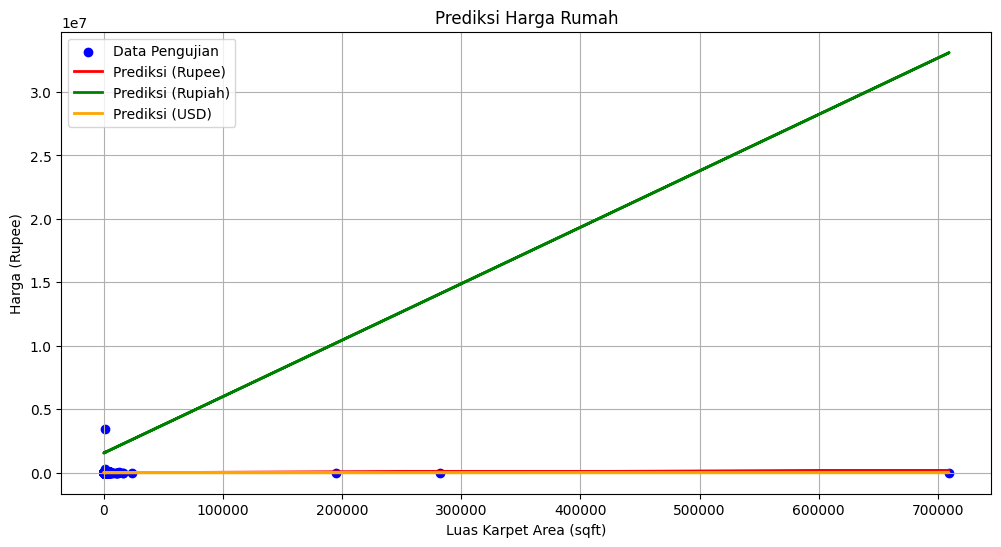

In [109]:
# Visualisasi prediksi dan data pengujian dalam grafik
plt.figure(figsize=(12, 6))

# Plot data pengujian
plt.scatter(X_test, y_test, color='blue', label='Data Pengujian')

# Plot prediksi dalam Rupee
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Prediksi (Rupee)')

# Plot prediksi dalam Rupiah
plt.plot(X_test, y_pred_rupiah, color='green', linewidth=2, label='Prediksi (Rupiah)')

# Plot prediksi dalam USD
plt.plot(X_test, y_pred_usd, color='orange', linewidth=2, label='Prediksi (USD)')

plt.title('Prediksi Harga Rumah')
plt.xlabel('Luas Karpet Area (sqft)')
plt.ylabel('Harga (Rupee)')
plt.legend()
plt.grid(True)
plt.show()

In [110]:
# Memprediksi harga rumah dengan ukuran tertentu, misalnya 100 m2
ukuran_baru = np.array([[100 * 10.7639]])  # Mengonversi dari m2 ke sqft
harga_prediksi = model.predict(ukuran_baru)
harga_prediksi_rupiah = harga_prediksi[0] * kurs_rupee_to_rupiah
harga_prediksi_usd = harga_prediksi[0] * kurs_rupee_to_usd
print("Harga prediksi untuk rumah dengan ukuran 100 m2 dalam Rupee:", harga_prediksi[0], "rupees")
print("Harga prediksi untuk rumah dengan ukuran 100 m2 dalam Rupiah:", harga_prediksi_rupiah, "rupiah")
print("Harga prediksi untuk rumah dengan ukuran 100 m2 dalam USD:", harga_prediksi_usd, "USD")

Harga prediksi untuk rumah dengan ukuran 100 m2 dalam Rupee: 8154.750519698978 rupees
Harga prediksi untuk rumah dengan ukuran 100 m2 dalam Rupiah: 1594661.4641271352 rupiah
Harga prediksi untuk rumah dengan ukuran 100 m2 dalam USD: 97.85700623638773 USD


c:\Users\Asus p1412Ce\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Note 
I created a sample dataset, which consists of 10% of the original data, due to the limitation in GitHub upload size.

### [Link to the original data](https://www.kaggle.com/datasets/juhibhojani/house-price/data)



In [111]:
# Membuat sampel dari dataset, misalnya 10% dari total data
sample_df = df.sample(frac=0.1, random_state=42)  # Menggunakan random_state untuk reproducibility

# Ubah path sesuai dengan lokasi dan nama file CSV yang ingin Anda simpan
output_file = "E:/house price prediction/dataset/sample_house_prices.csv"

# Menyimpan sampel ke file CSV
sample_df.to_csv(output_file, index=False)  # index=False untuk menghindari penambahan indeks saat menyimpan